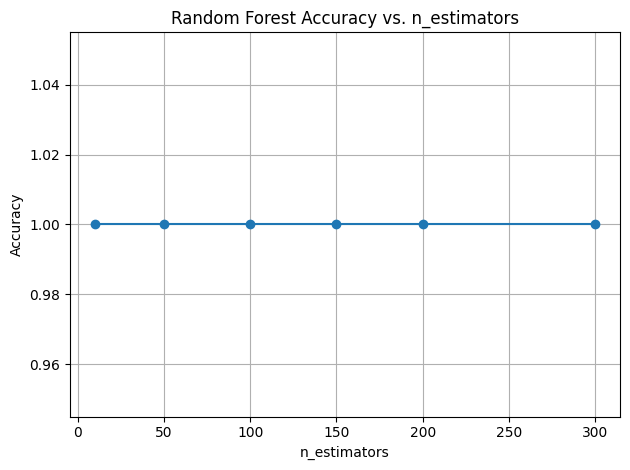

Best accuracy of 1.0000 achieved with n_estimators = 10


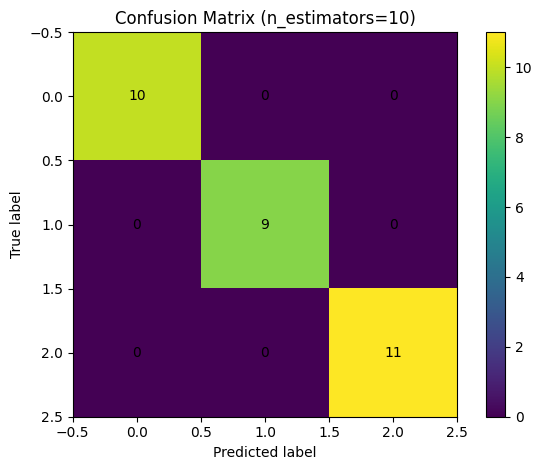

In [3]:
import os
# Limit threads to avoid resource issues
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
df = pd.read_csv('iris.csv')  # or 'iris.csv' if you're running locally
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Tune n_estimators and record accuracies
n_list = [10, 50, 100, 150, 200, 300]
acc_list = []
for n in n_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=1)
    rf.fit(X_train, y_train)
    acc_list.append( accuracy_score(y_test, rf.predict(X_test)) )

# 4. Plot Accuracy vs. n_estimators
plt.figure()
plt.plot(n_list, acc_list, marker='o')
plt.title('Random Forest Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Find best setting
best_idx = acc_list.index(max(acc_list))
best_n   = n_list[best_idx]
best_acc = acc_list[best_idx]
print(f"Best accuracy of {best_acc:.4f} achieved with n_estimators = {best_n}")

# 6. Re-train best model & compute confusion matrix
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=42, n_jobs=1)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
cm     = confusion_matrix(y_test, y_pred)

# 7. Plot Confusion Matrix
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title(f'Confusion Matrix (n_estimators={best_n})')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.colorbar()
plt.tight_layout()
plt.show()
